# Slides exploration and visualisation

In [1]:
import seaborn as sns
from queries import*
from utilities import*
import os
import matplotlib 


In [39]:
plt.rcParams['font.size'] = '17'
PLOT_DIRECTORY = './plots/ANALYSIS/'

In [37]:
Directory = os.getcwd()
INPUT_PATH = Directory + '/data/input/'+'DEEPMEL_1Z2/'
nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_1Z2_cell_seg_data.csv')
len(nodes)

2055695

## Phenotype counting per slide
Here we extract a table for CHUV doctors, in which we count the phenotypes per slides

In [17]:
Directory = os.getcwd()
Directory_path = Directory + '/data/input'
files = os.listdir(Directory_path)
count_phenotype = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        INPUT_PATH = './data/input/DEEPMEL_' + PATIENT_ID + '/'
        
        nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
        pheno_count = pd.DataFrame(nodes.phenotype.value_counts()).reset_index().rename(columns = {'index':'stainnings', 'phenotype':'count'})
        pheno_count_pivotted = pd.pivot_table(pheno_count, values='count', index=[],columns=['stainnings'], aggfunc=np.sum)
        pheno_count_pivotted.columns.name = None
        
        pheno_count_pivotted = pheno_count_pivotted.fillna(0)
        pheno_count_pivotted = pheno_count_pivotted.reset_index()
        pheno_count_pivotted = pheno_count_pivotted.drop(['index'], axis=1)
        pheno_count_pivotted['name'] = PATIENT_ID
        
        count_phenotype = pd.concat([count_phenotype,pheno_count_pivotted])        

Treating patient3P1
Treating patient3F1
Treating patient1L1
Treating patient3M1
Treating patient1K1
Treating patient1R1
Treating patient2A1
Treating patient1D1
Treating patient1Z2
Treating patient3I1
Treating patient1Y1
Treating patient1Y1
Treating patient2C1
Treating patient3E1
Treating patient3A1
Treating patient2T1
Treating patient3J1
Treating patient1V2
Treating patient3N1
Treating patient3G1
Treating patient2K3
Treating patient1S1
Treating patient2U1
Treating patient1O2
Treating patient2T2
Treating patient2B1
Treating patient2P1
Treating patient2P1
Treating patient1C1
Treating patient2L1
Treating patient1P1
Treating patient1X1
Treating patient2O1
Treating patient1U1
Treating patient2H1
Treating patient1X3
Treating patient1J2
Treating patient3D1
Treating patient1E1
Treating patient3J2
Treating patient1W1
Treating patient1J1
Treating patient2V1
Treating patient2Y1
Treating patient1F1
Treating patient2G1
Treating patient2R1
Treating patient1M1
Treating patient2K1
Treating patient2Z1


In [20]:
count_phenotype = count_phenotype.fillna(0)

In [24]:
columns = list(count_phenotype.columns[16:]) + list(count_phenotype.columns[:16])

In [26]:
count_phenotype = count_phenotype[columns]

In [38]:
count_phenotype = count_phenotype.drop_duplicates(['name'])

In [44]:
count_phenotype.to_csv('./data/output/pheno_count.csv', index=False)

In [3]:
count_phenotype = pd.read_csv('./data/output/pheno_count.csv')

In [4]:
len(count_phenotype)

63

In [5]:
count_phenotype.head(2)

name  CD11Cp  CD11Cp_CD56p  CD11Cp_CD68p   CD11cp  CD11cp_CD56p  \
0   3P1     0.0           0.0           0.0  14056.0         280.0   
1   3F1     0.0           0.0           0.0    120.0           0.0   
2   1L1     0.0           0.0           0.0    676.0           3.0   
3   3M1     0.0           0.0           0.0  49979.0        1810.0   
4   1K1  1035.0           8.0          10.0      0.0           0.0   
..  ...     ...           ...           ...      ...           ...   
58  2J1     0.0           0.0           0.0   1244.0          13.0   
59  2B2     0.0           0.0           0.0  11837.0           1.0   
60  2X1     0.0           0.0           0.0   2967.0           6.0   
61  3H1     0.0           0.0           0.0  14434.0         501.0   
62  1N1     0.0           0.0           0.0   2426.0           7.0   

    CD11cp_CD68p   CD20p  CD20p_CD56p  CD20p_CD68p    CD3p  CD3p_CD56p  \
0         2570.0   21867        216.0        802.0  340303      1730.0   
1           16.0    3400          0.0         27.0   11577         0.0   
2          881.0    1143          0.0         36.0   13503         2.0   
3         5670.0   19159        296.0        296.0  317707      1592.0   
4            0.0     441          3.0          2.0    8298        24.0   
..           ...     ...          ...          ...     ...         ...   
58          67.0   21689         26.0         48.0   67645        97.0   
59         658.0   13774         13.0        126.0   67886        32.0   
60          73.0    8476          7.0         38.0   43321        25.0   
61        1088.0  101647        599.0       3165.0  297836      1649.0   
62         935.0   20656         30.0        360.0   70675        53.0   

    CD3p_CD68p  CD56p  CD68p   DAPIp  MISSING  SOX10p  SOX10p_CD56p  \
0       5900.0   4962  44131  492435    19796  969284        1235.0   
1         19.0     71   1142   56068      789   19971          31.0   
2         81.0    180   6612  131324     2682  108052           9.0   
3       3271.0   7397  20693  949911    17460  371629         835.0   
4         16.0     48     66   18012      884   35453          55.0   
..         ...    ...    ...     ...      ...     ...           ...   
58        85.0   2073   1679   70505     4464  225937        3332.0   
59       912.0    157  35523  286841    14235  889180           4.0   
60       138.0    379   4461  286571     8086  391058          66.0   
61      4360.0  29161  40424  493317    14458  428111        9661.0   
62       138.0   1172  13740  281270     4680   98326          37.0   

    SOX10p_CD68p  
0           2581  
1              2  
2            135  
3            244  
4              4  
..           ...  
58           520  
59           410  
60           111  
61          2089  
62           503  

[63 rows x 20 columns]

## Inspecting Double positive stainings : SOX10p_CD56p , SOX10p_CD68p

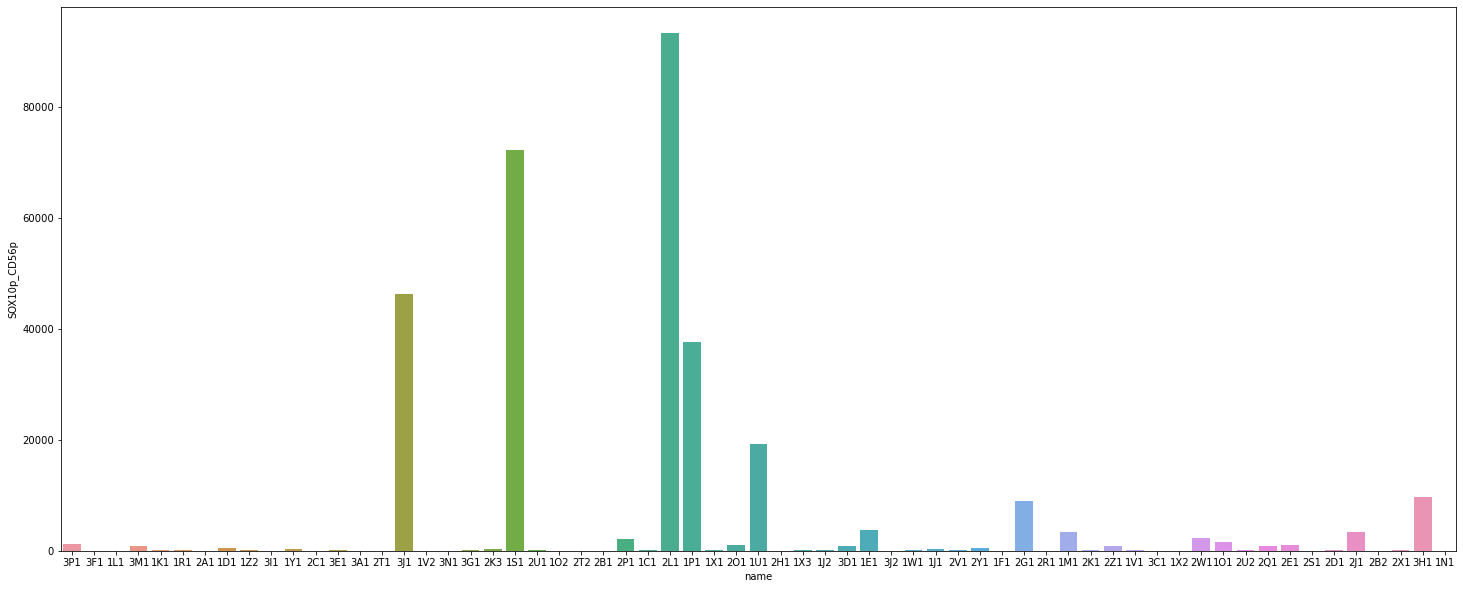

In [19]:
columns_to_keep = ['name', 'SOX10p_CD56p', 'SOX10p_CD68p']
data = count_phenotype[columns_to_keep]
plt.subplots(figsize=(25, 10))

sns.barplot(x="name", y="SOX10p_CD56p", data=data)
plt.savefig(PLOT_DIRECTORY +'SOX10p_CD56p.png')

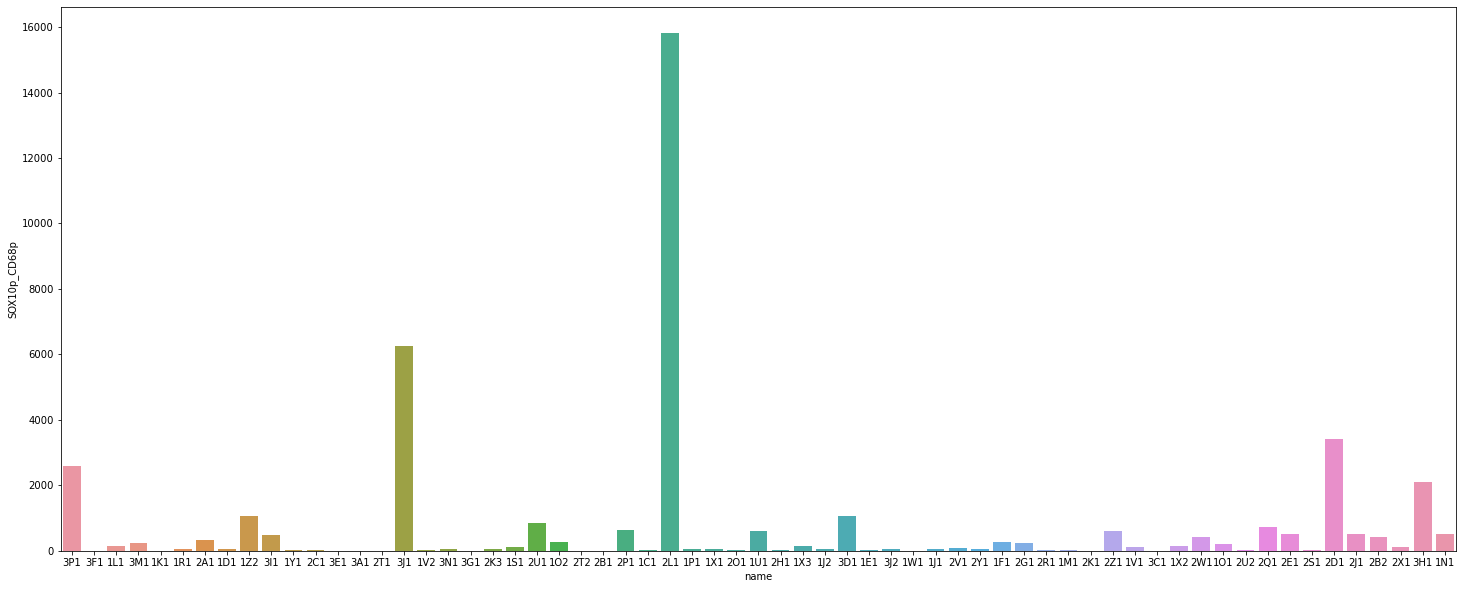

In [20]:
columns_to_keep = ['name', 'SOX10p_CD56p', 'SOX10p_CD68p']
data = count_phenotype[columns_to_keep]
f, ax = plt.subplots(figsize=(25, 10))

ax = sns.barplot(x="name", y="SOX10p_CD68p", data=data,  )
plt.savefig(PLOT_DIRECTORY +'SOX10p_CD68p.png')

## Explorining the repartition of Tissue type (category) per slide

In [38]:
Directory = os.getcwd()
Directory_path = Directory + '/data/input'
files = os.listdir(Directory_path)
count_tissue = pd.DataFrame({})

len_slide = {}

for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        INPUT_PATH = './data/input/DEEPMEL_' + PATIENT_ID + '/'
        
        nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
        n = len(nodes)
    
        count_tissu = pd.DataFrame(nodes.tissue_category.value_counts()).reset_index().rename(columns={'tissue_category':'count','index':'tissue'})
        count_tissu['count'] = count_tissu['count']/n
        count_tissue_pivotted = pd.pivot_table(count_tissu, values='count', index=[],columns=['tissue']) 
        count_tissue_pivotted.columns.name = None
        
        count_tissue_pivotted = count_tissue_pivotted.fillna(0)
        count_tissue_pivotted = count_tissue_pivotted.reset_index()
        count_tissue_pivotted = count_tissue_pivotted.drop(['index'], axis=1)
        count_tissue_pivotted['name'] = PATIENT_ID
        
        count_tissue = pd.concat([count_tissue,count_tissue_pivotted])              

Treating patient1C1
Treating patient1D1
Treating patient1E1
Treating patient1F1
Treating patient1J1
Treating patient1J2
Treating patient1K1
Treating patient1L1
Treating patient1M1
Treating patient1N1
Treating patient1O1
Treating patient1O2
Treating patient1P1
Treating patient1R1
Treating patient1S1
Treating patient1U1
Treating patient1V1
Treating patient1V2
Treating patient1W1
Treating patient1X1
Treating patient1X2
Treating patient1X3
Treating patient1Y1
Treating patient1Z2
Treating patient2A1
Treating patient2B1
Treating patient2B2
Treating patient2C1
Treating patient2D1
Treating patient2E1
Treating patient2G1
Treating patient2H1
Treating patient2J1
Treating patient2K1
Treating patient2K3
Treating patient2L1
Treating patient2O1
Treating patient2P1
Treating patient2Q1
Treating patient2R1
Treating patient2S1
Treating patient2T1
Treating patient2T2
Treating patient2U1
Treating patient2U2
Treating patient2V1
Treating patient2W1
Treating patient2X1
Treating patient2Y1
Treating patient2Z1


In [40]:
count_tissue

missing    stroma     tumor name
0   0.000279  0.253880  0.745841  1C1
0   0.000053  0.418555  0.581393  1D1
0   0.075015  0.389825  0.535160  1E1
0   0.001918  0.676114  0.321968  1F1
0   0.023385  0.129217  0.847398  1J1
..       ...       ...       ...  ...
0   0.054147  0.238334  0.707519  3J2
0   0.003843  0.573754  0.422402  3M1
0   0.003900  0.379277  0.616823  3N1
0   0.014806  0.330221  0.654973  3P1
0   0.014806  0.330221  0.654973  3P1

[64 rows x 4 columns]

In [41]:
A = pd.DataFrame(len_slide.iloc[0,:]).sort_values(by=0)

AttributeError: 'dict' object has no attribute 'iloc'

In [88]:
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

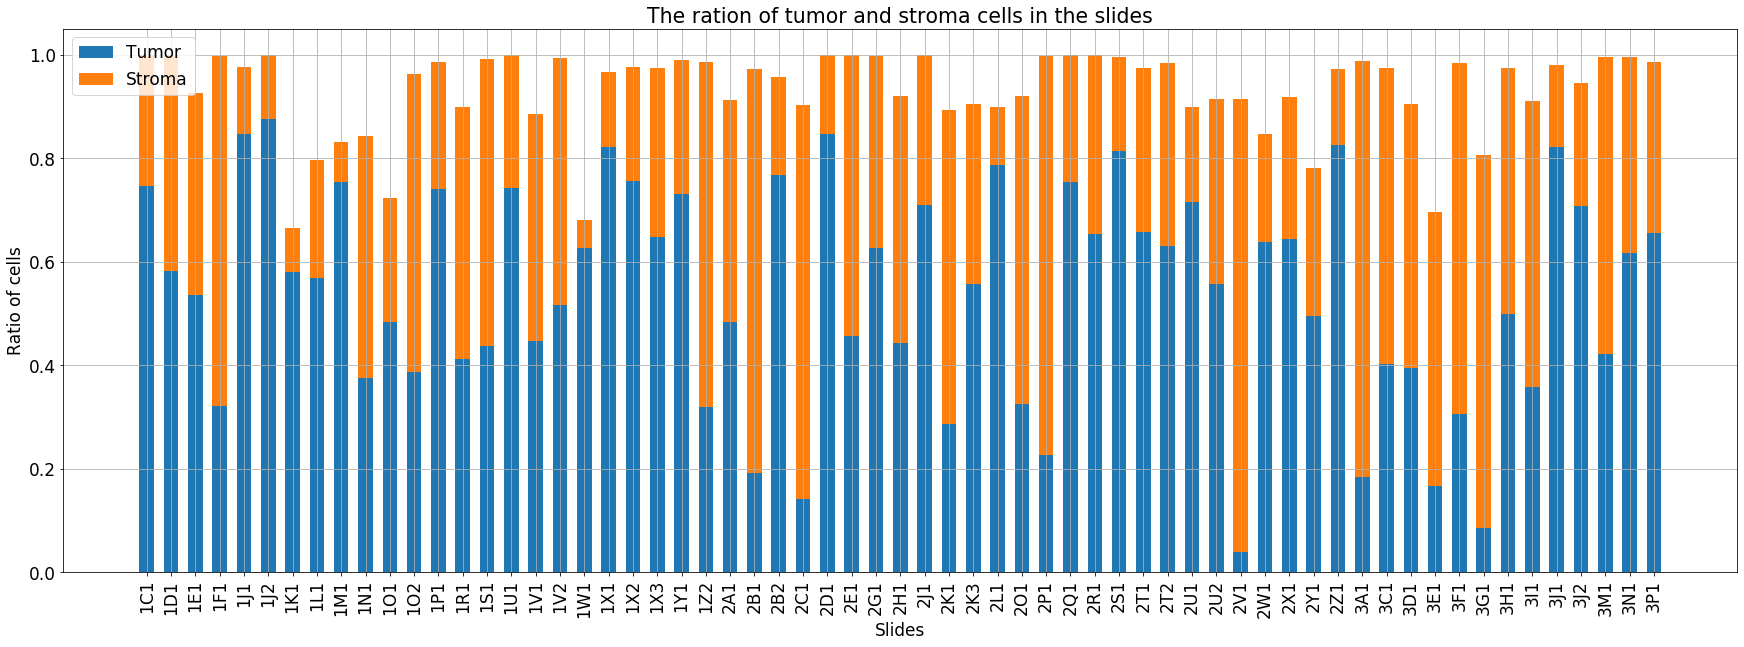

In [42]:
missing = count_tissue.missing.values
stroma = count_tissue.stroma.values
tumor = count_tissue.tumor.values

name = count_tissue.name.values
width = 0.6

fig, ax = plt.subplots(figsize = (30,10))

ax.bar(name, tumor, width, label='Tumor')
ax.bar(name, stroma, width, bottom = tumor, label='Stroma', )
plt.xticks(rotation=90) 
plt.title('The ration of tumor and stroma cells in the slides')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Ratio of cells')
ax.legend()
plt.savefig(PLOT_DIRECTORY +'ratio_tumor_stroma.png')

In [55]:
x = A.index
y = A.iloc[:,0].values

In [96]:
f, ax = plt.subplots(figsize=(25, 10))
plt.bar(x=x,height=y)
plt.xticks(rotation=90) 

plt.title('Size per slides')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Size')
plt.savefig(PLOT_DIRECTORY +'Size_per_slide.png')
plt.close()

### Visualising slides: Per Tissue category

In [6]:
PATIENT_ID = '1W1' 
INPUT =   './data/input'
PLOT_DIRECTORY =   './plots/DEEPMEL_'
INPUT_PATH = './data/input/DEEPMEL_' + PATIENT_ID + '/'
nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
unique_pheno = nodes["phenotype"].unique()
palette_pheno = dict(zip(unique_pheno, sns.color_palette(n_colors=len(unique_pheno))))
unique_tissue = nodes["tissue_category"].unique()
palette_tissue = dict(zip(unique_tissue, sns.color_palette(n_colors=len(unique_tissue))))

In [7]:
len(nodes)

1264100

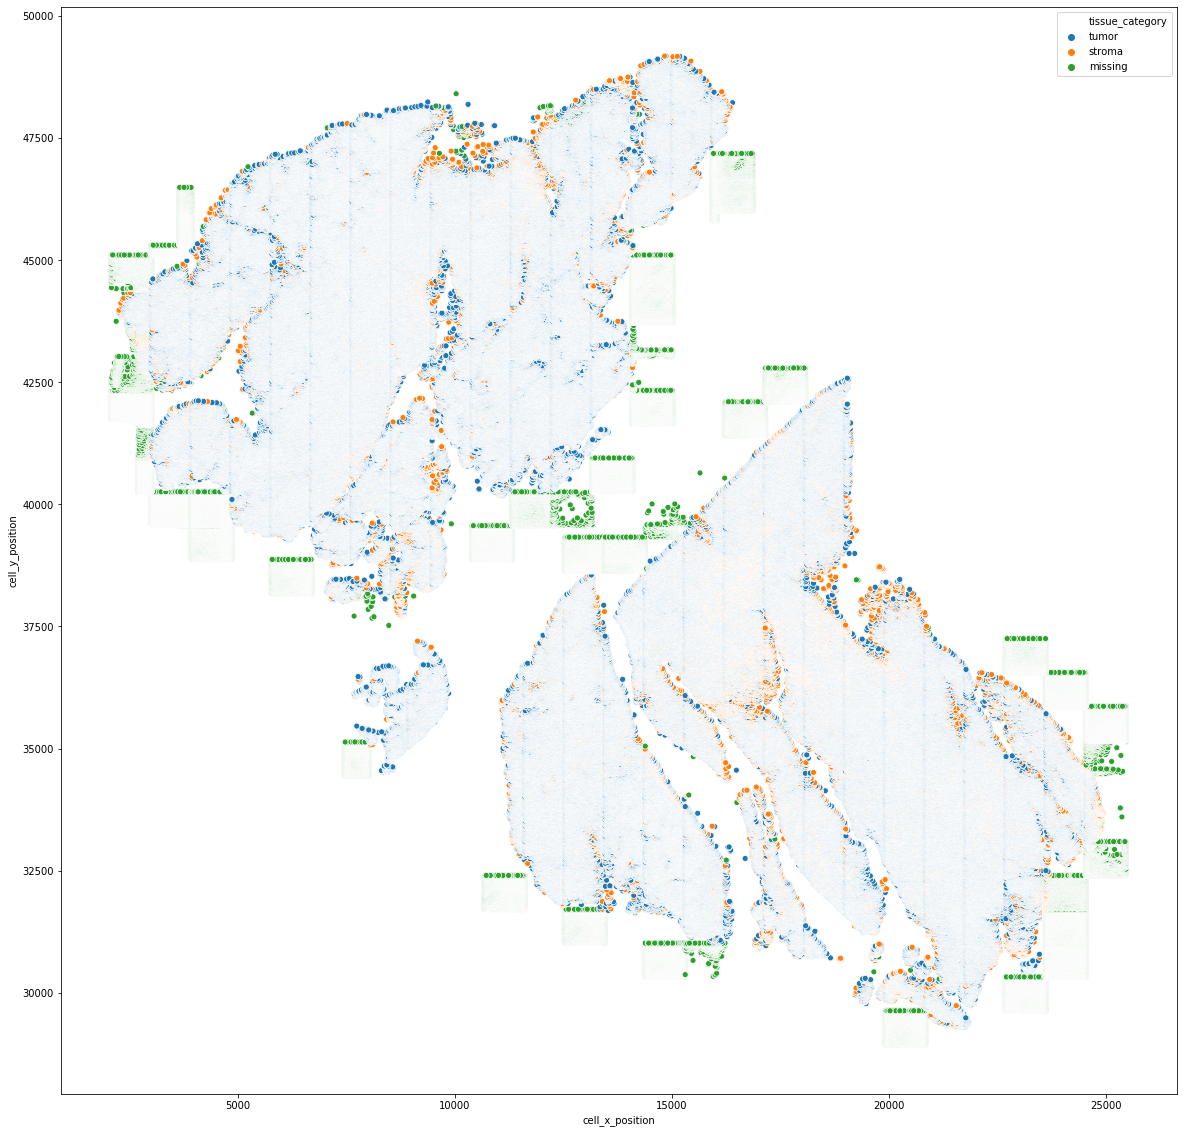

In [8]:
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'tissue_category',palette = palette_tissue)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'/whole_slide_per_tissue_'+PATIENT_ID+'staining.png')

In [ ]:
## Visualising slides : per phenotype

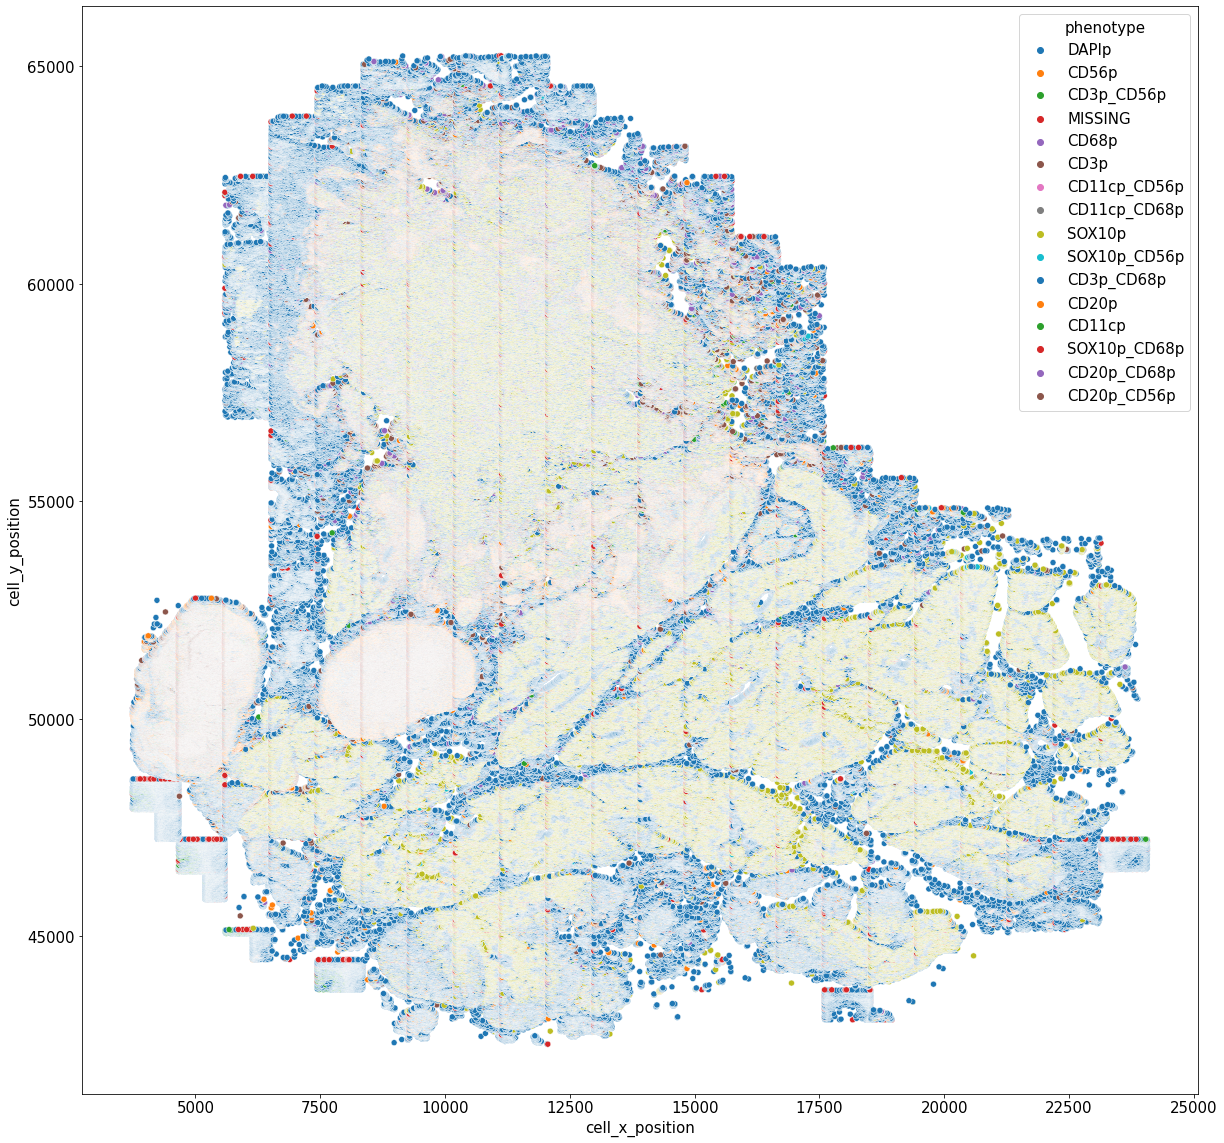

In [129]:
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'phenotype',palette = palette_pheno)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'/whole_slide_per_phenotype_'+PATIENT_ID+'staining.png')

In [130]:
nodes['phenotype'] = nodes['phenotype'].apply(lambda x: get_phenotype(x))

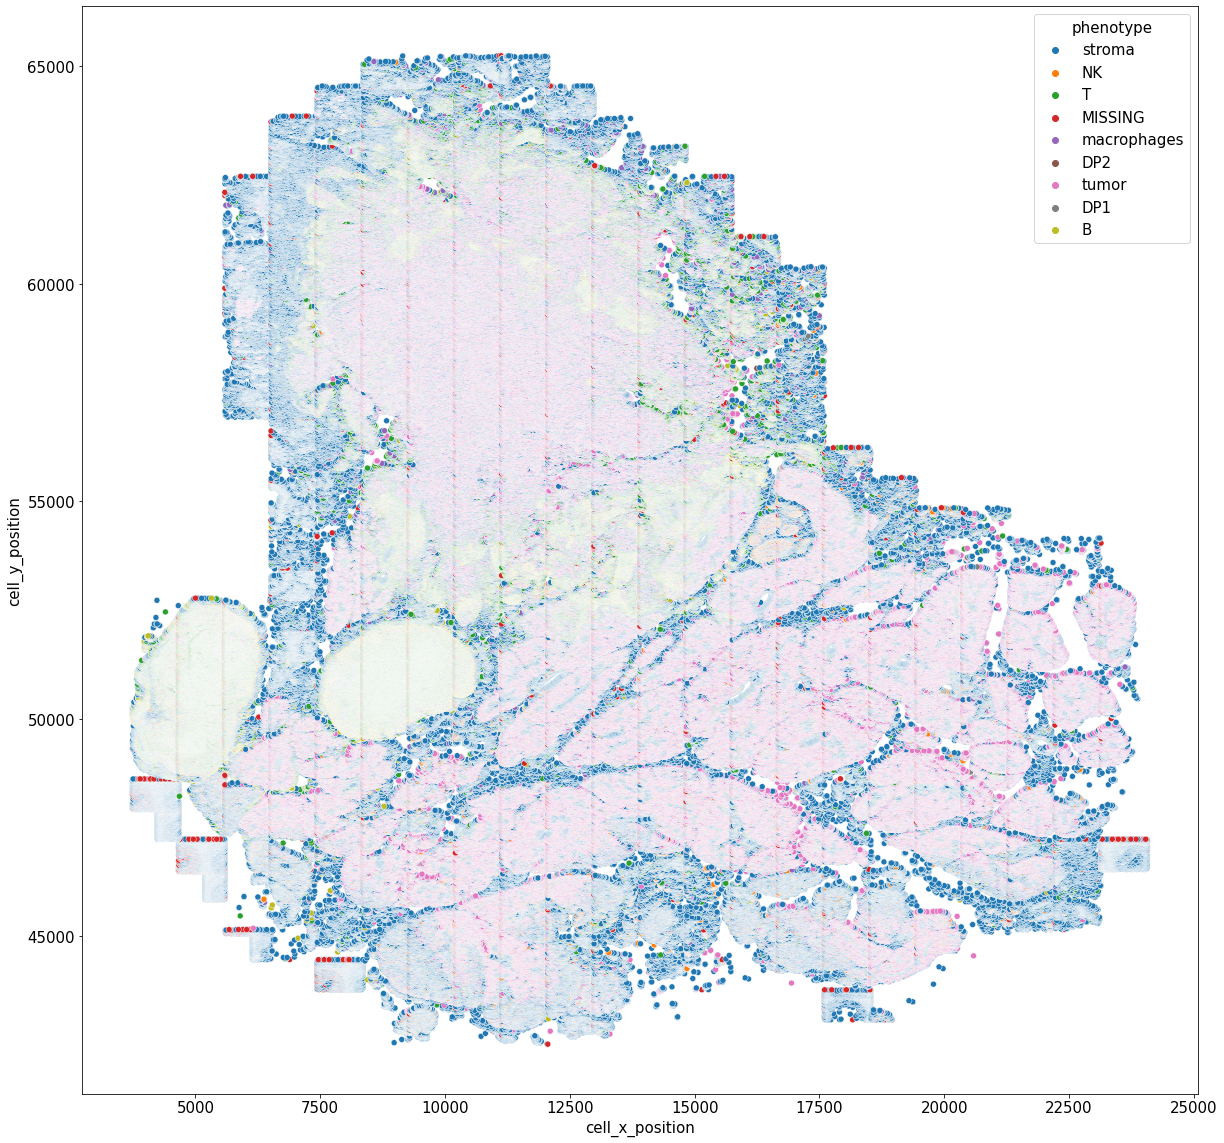

In [131]:
unique_pheno = nodes["phenotype"].unique()
palette_pheno = dict(zip(unique_pheno, sns.color_palette(n_colors=len(unique_pheno))))
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'phenotype',palette = palette_pheno)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'/whole_slide_per_mapped_phenotype_'+PATIENT_ID+'staining.png')

## Counting Edges, Before and after thresholding

In [18]:
Directory = os.getcwd()
Directory_path = Directory + '/data/output'
files = os.listdir(Directory_path)
count_edge = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition = ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID + '/'
        
        edges = pd.read_csv(OUTPUT_PATH+'graph_edges.csv')
        n = len(edges)
        df = pd.DataFrame({'name':PATIENT_ID, 'count':n}, index =[0])
        
        count_edge = pd.concat([count_edge,df])        

Treating patient1C1
Treating patient1D1
Treating patient1E1
Treating patient1F1
Treating patient1J1
Treating patient1J2
Treating patient1K1
Treating patient1L1
Treating patient1M1
Treating patient1N1
Treating patient1O1
Treating patient1O2
Treating patient1P1
Treating patient1R1
Treating patient1S1
Treating patient1U1
Treating patient1V1
Treating patient1V2
Treating patient1W1
Treating patient1X1
Treating patient1X2
Treating patient1X3
Treating patient1Y1
Treating patient1Z2
Treating patient2A1
Treating patient2B1
Treating patient2B2
Treating patient2C1
Treating patient2D1
Treating patient2E1
Treating patient2G1
Treating patient2H1
Treating patient2J1
Treating patient2K1
Treating patient2K3
Treating patient2L1
Treating patient2O1
Treating patient2P1
Treating patient2Q1
Treating patient2R1
Treating patient2S1
Treating patient2T1
Treating patient2T2
Treating patient2U1
Treating patient2U2
Treating patient2V1
Treating patient2W1
Treating patient2X1
Treating patient2Y1
Treating patient2Z1


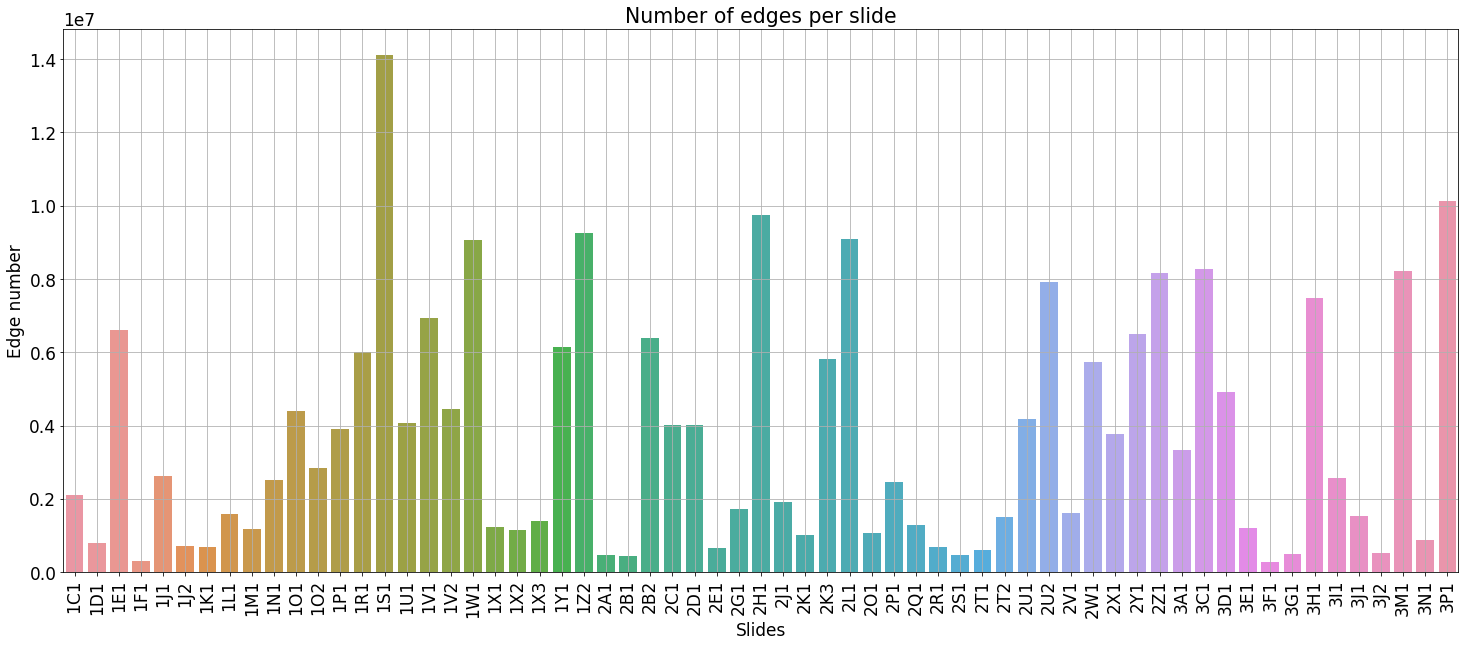

In [23]:
plt.subplots(figsize=(25, 10))
PLOT_DIRECTORY = './plots/ANALYSIS/'

sns.barplot(x="name", y='count', data=count_edge)
plt.xticks(rotation=90) 
plt.title('Number of edges per slide')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Edge number')
plt.savefig(PLOT_DIRECTORY +'n_edges_slides.png')

In [25]:
Directory = os.getcwd()
Directory_path = Directory + '/data/output'
files = os.listdir(Directory_path)
count_edge = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition = ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID + '/'
        
        edges = pd.read_csv(OUTPUT_PATH+'edges_thrd_35.csv')
        n = len(edges)
        df = pd.DataFrame({'name':PATIENT_ID, 'count':n}, index =[0])
        
        count_edge = pd.concat([count_edge,df])        

Treating patient1C1
Treating patient1D1
Treating patient1E1
Treating patient1F1
Treating patient1J1
Treating patient1J2
Treating patient1K1
Treating patient1L1
Treating patient1M1
Treating patient1N1
Treating patient1O1
Treating patient1O2
Treating patient1P1
Treating patient1R1
Treating patient1S1
Treating patient1U1
Treating patient1V1
Treating patient1V2
Treating patient1W1
Treating patient1X1
Treating patient1X2
Treating patient1X3
Treating patient1Y1
Treating patient1Z2
Treating patient2A1
Treating patient2B1
Treating patient2B2
Treating patient2C1
Treating patient2D1
Treating patient2E1
Treating patient2G1
Treating patient2H1
Treating patient2J1
Treating patient2K1
Treating patient2K3
Treating patient2L1
Treating patient2O1
Treating patient2P1
Treating patient2Q1
Treating patient2R1
Treating patient2S1
Treating patient2T1
Treating patient2T2
Treating patient2U1
Treating patient2U2
Treating patient2V1
Treating patient2W1
Treating patient2X1
Treating patient2Y1
Treating patient2Z1


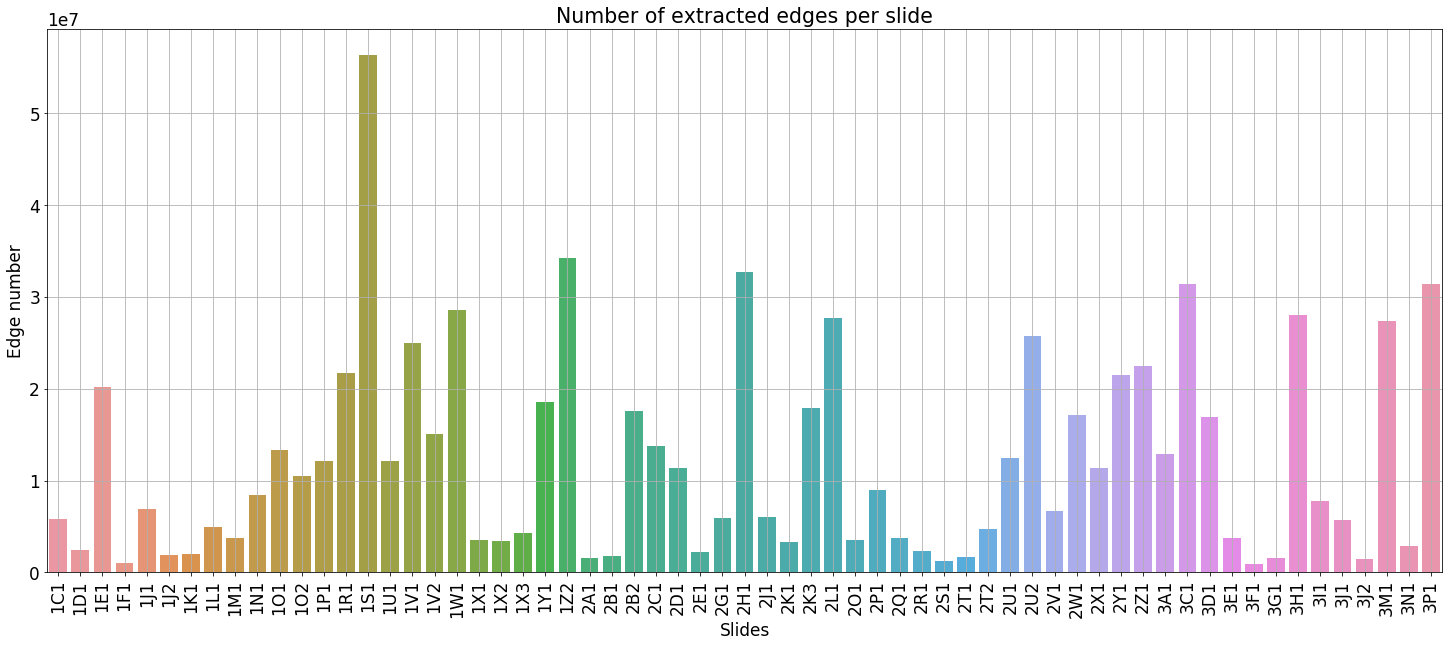

In [26]:
plt.subplots(figsize=(25, 10))
PLOT_DIRECTORY = './plots/ANALYSIS/'

sns.barplot(x="name", y='count', data=count_edge)
plt.xticks(rotation=90) 
plt.title('Number of extracted edges per slide')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Edge number')
plt.savefig(PLOT_DIRECTORY +'n_edges_slides_before_thrd.png')